In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 

In [3]:
#Import plotting libraries. 
# Plotly can be useful for Choropleth- data on maps. 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [4]:
#Load the data into a pandas dataframe. 
df=pd.read_csv("/content/drive/MyDrive/kaggle project/covid vaccine rate/covid vaccine rate/archive (1)/country_vaccinations.csv")

In [5]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


Above, we see a lot of NaNs that we need to fill with some values, zeros make the most sense here. 

Let us check how many NaNs for each column. 

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     31458
people_vaccinated                      32943
people_fully_vaccinated                35556
daily_vaccinations_raw                 37925
daily_vaccinations                       366
total_vaccinations_per_hundred         31458
people_vaccinated_per_hundred          32943
people_fully_vaccinated_per_hundred    35556
daily_vaccinations_per_million           366
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
#Fill NaNs with 0 and then drop all countries with iso_code = 0. This is key information that we need so dropping unknowns is the best way to handle. 
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [8]:
#Check how many nulls we have. SHould be none. 
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              66330 non-null  object 
 1   iso_code                             66330 non-null  object 
 2   date                                 66330 non-null  object 
 3   total_vaccinations                   66330 non-null  float64
 4   people_vaccinated                    66330 non-null  float64
 5   people_fully_vaccinated              66330 non-null  float64
 6   daily_vaccinations_raw               66330 non-null  float64
 7   daily_vaccinations                   66330 non-null  float64
 8   total_vaccinations_per_hundred       66330 non-null  float64
 9   people_vaccinated_per_hundred        66330 non-null  float64
 10  people_fully_vaccinated_per_hundred  66330 non-null  float64
 11  daily_vaccinations_per_milli

The date is in the 'object' format. Let us change it to Datetime format for easy handling and plotting. 

In [10]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')

In [11]:
#Print column names and drop the ones we don't intend to use. 
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [12]:
#dropping unnesesary colums

In [13]:
df.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred",
         "daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

Now, let us try to undersatnad the data. I am picking US and Bangladesh for my study. 

**USA**

In [14]:
#Save USA data into a separate dataframe
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
63202,United States,USA,2020-12-13,24147.0,20435.0,0.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63203,United States,USA,2020-12-14,28547.0,24696.0,4400.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63204,United States,USA,2020-12-15,77567.0,71493.0,26710.0,0.02,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63205,United States,USA,2020-12-16,236843.0,225301.0,70899.0,0.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63206,United States,USA,2020-12-17,508232.0,489577.0,121021.0,0.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...
63573,United States,USA,2021-12-19,497402001.0,240791692.0,1357692.0,149.82,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63574,United States,USA,2021-12-20,498963090.0,241190527.0,1365238.0,150.29,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63575,United States,USA,2021-12-21,500063936.0,241472043.0,1295702.0,150.62,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
63576,United States,USA,2021-12-22,500222328.0,241520559.0,1093452.0,150.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [16]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace = True)

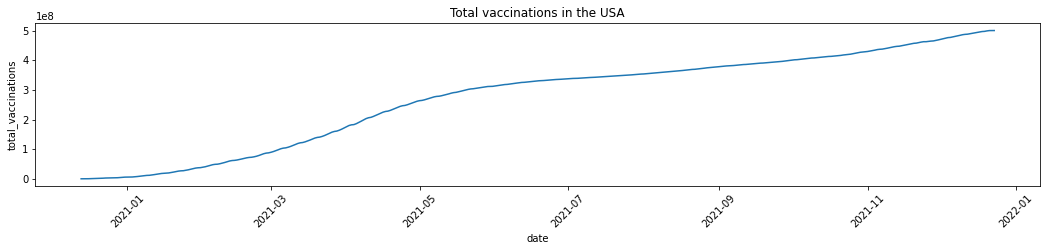

In [55]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,3))
sns.lineplot(data=df_USA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in the USA')

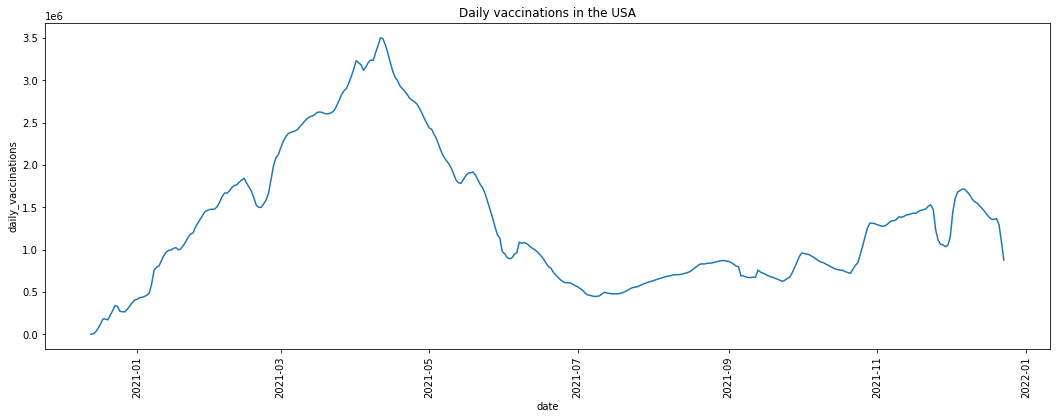

In [18]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the USA")

**India**

In [19]:
#Save bangladesh data into a separate dataframe
df_bd = df[df["iso_code"] == 'BGD'].copy()
df_bd

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
4750,Bangladesh,BGD,2021-01-26,0.0,0.0,0.0,0.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4751,Bangladesh,BGD,2021-01-27,26.0,26.0,26.0,0.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4752,Bangladesh,BGD,2021-01-28,567.0,567.0,284.0,0.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4753,Bangladesh,BGD,2021-01-29,0.0,0.0,1209.0,0.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
4754,Bangladesh,BGD,2021-01-30,0.0,0.0,1671.0,0.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
...,...,...,...,...,...,...,...,...
5071,Bangladesh,BGD,2021-12-13,129852800.0,86522300.0,3822997.0,78.08,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
5072,Bangladesh,BGD,2021-12-14,131186888.0,87183515.0,3931169.0,78.88,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
5073,Bangladesh,BGD,2021-12-15,131370116.0,87200103.0,3747377.0,78.99,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
5074,Bangladesh,BGD,2021-12-16,131711760.0,87327614.0,3590945.0,79.20,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


In [21]:
#Drop the dates with missing values, previously NaN that we filled with 0. 
df_bd.drop(df_bd.index[df_bd['total_vaccinations'] == 0], inplace = True)

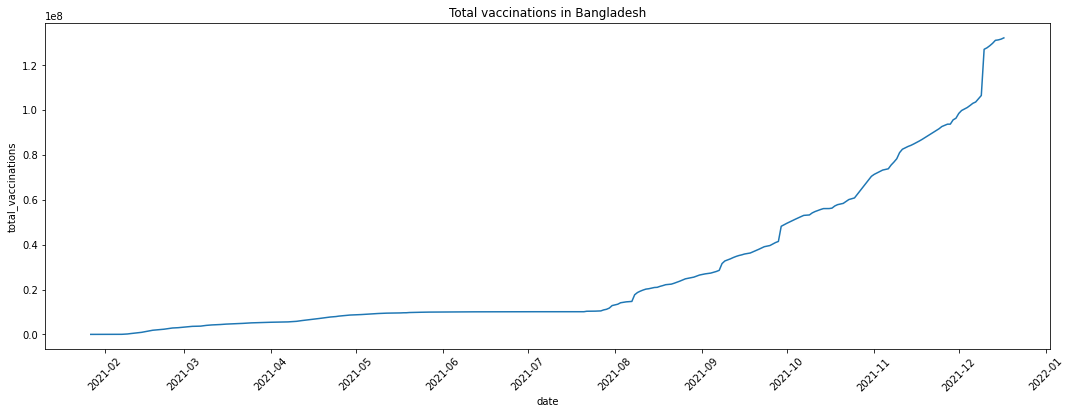

In [22]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_bd, x="date", y="total_vaccinations")
plt.title("Total vaccinations in Bangladesh")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in Bangladesh')

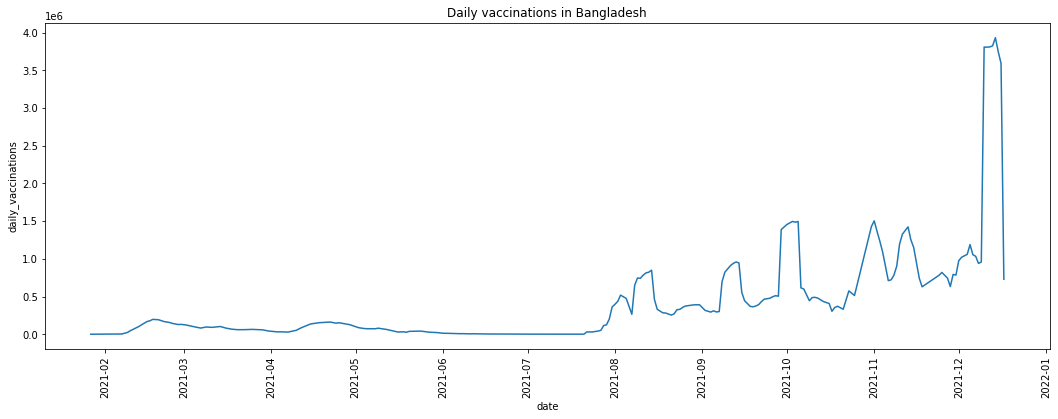

In [23]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_bd, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in Bangladesh")

Top 20 countries with highest amount of vaccinated people per 100 of the population.(First sorted by total vaccinations deployed to make sure the data is not skewed by small countires with low populations)

In [27]:
#Group by total vaccinations given by country and sort descending to identify the top 20 countries. 
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:20]
vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,3503701.0,150.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,1997542.0,157.97,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,1091256.0,174.75,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [28]:
#Now sort by total vaccinations per 100
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
England,OWID_ENG,2021-12-23,1.101738e+08,4.338855e+07,831591.0,194.83,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
United Kingdom,GBR,2021-12-23,1.311943e+08,5.164970e+07,970350.0,192.35,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Italy,ITA,2021-12-26,1.083857e+08,4.811530e+07,592796.0,179.54,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
France,FRA,2021-12-23,1.208647e+08,5.268481e+07,730165.0,178.89,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,1091256.0,174.75,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,1997542.0,157.97,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Turkey,TUR,2021-12-26,1.286549e+08,5.679928e+07,1264431.0,151.28,"Pfizer/BioNTech, Sinovac"


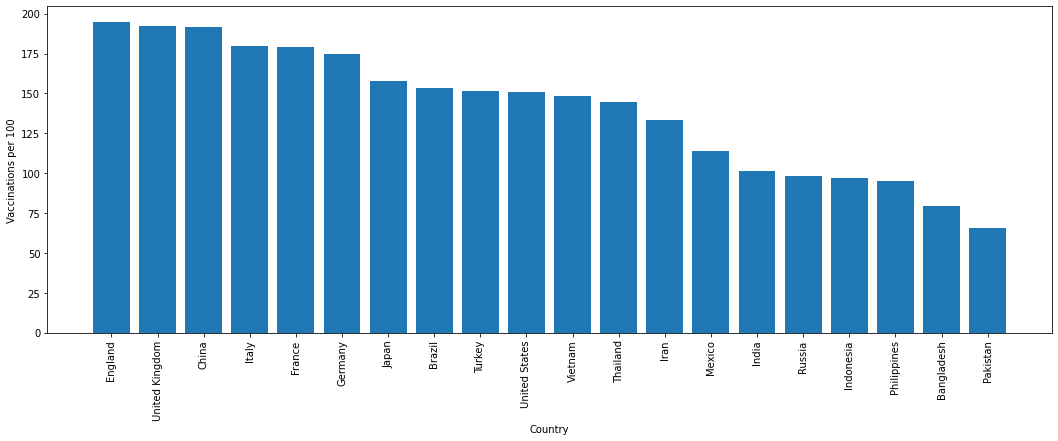

In [29]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)

plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

Country with most vaccinated people. Obviously, this will be skewed towards highest populated countries that effectively depoyed vaccinations to bulk of its population. 

In [30]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:20]
total_vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,3503701.0,150.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,1997542.0,157.97,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,1091256.0,174.75,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


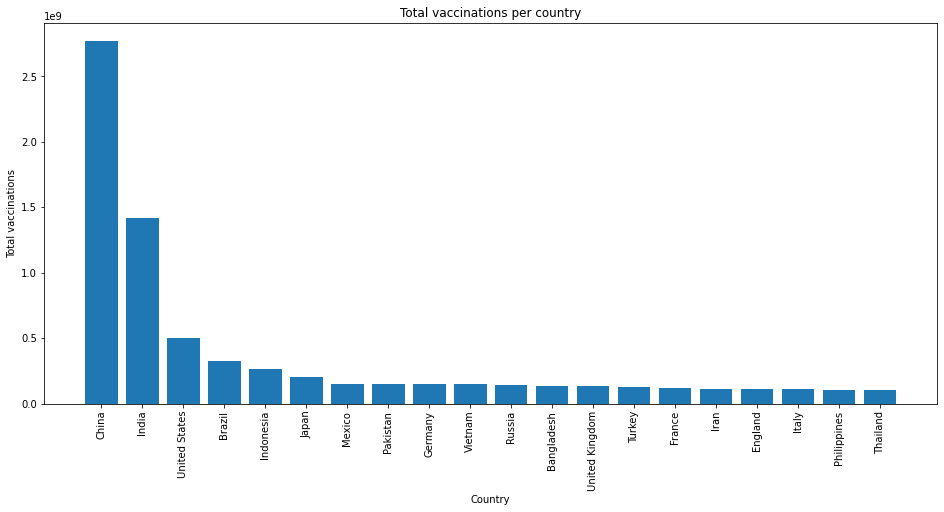

In [31]:

plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)

plt.title('Total vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Country')
plt.show()

In [45]:
#Sort by total vaccinations delivered by countries and group by vaccines. 
vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head(10)


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,3503701.0,201.69
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,1997542.0,205.38
"CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,1091256.0,208.04


In [49]:
#Get the top 20 vaccines by country for easy plotting
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,3503701.0,201.69
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,1997542.0,205.38
6,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,1091256.0,208.04
9,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2021-12-25,1.455954e+08,7.707463e+07,1675471.0,148.31


In [50]:
#Reset index to move vaccines from being index to a column. 
#This makes it easy for us to plot using Seaborn, especially if we want to sort by country. 
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,index,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77
1,1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53
2,2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,3503701.0,201.69
3,3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50
4,4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71
5,5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,1997542.0,205.38
6,6,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00
7,7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84
8,8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,1091256.0,208.04
9,9,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2021-12-25,1.455954e+08,7.707463e+07,1675471.0,148.31


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

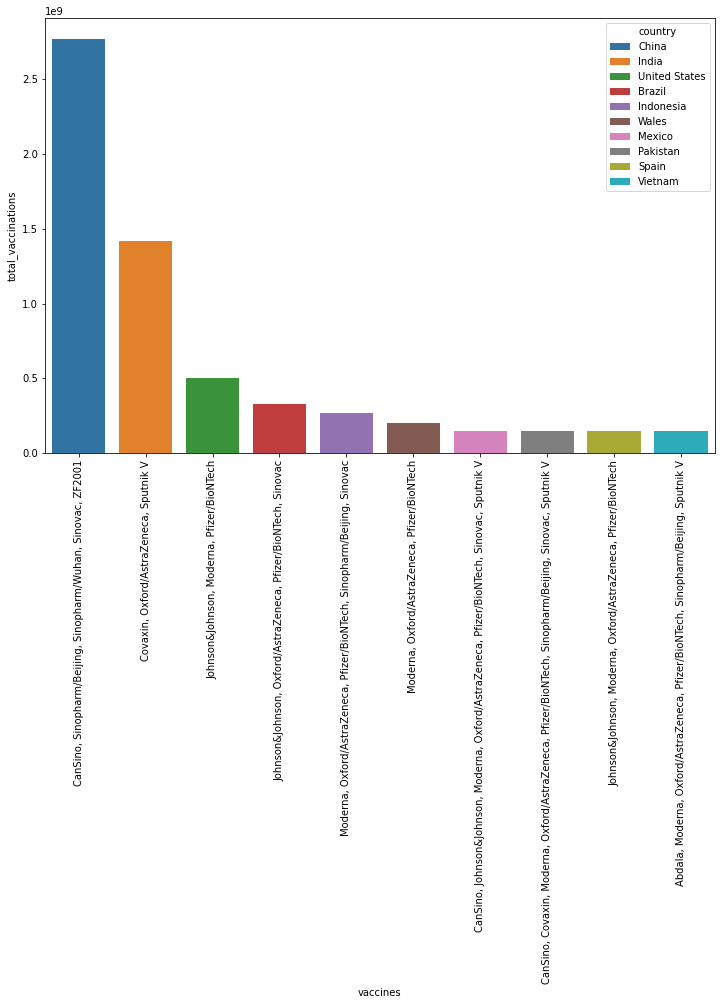

In [51]:
plt.figure(figsize=(12,8))

sns.barplot(data = vacc_names_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

Total vaccinations per hundred, by Country on a map. 

Warning: This can make your browser very slow. 

In [52]:
fig = px.choropleth(df.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  #No margin on left, right, top and bottom
fig.show()